In [11]:
import selection_sort as selection
import heap_sort as heap
import merge_sort as merge
import quick_sort as quick
import insertion_sort as insert
import random
from timeit import Timer

In [12]:
def crear_listas_con_10k_elementos(N):
    lista = list()
    for i in range(N):
        set1 = list(range(10000))
        random.shuffle(set1)
        lista.append(set1)
    return lista

In [13]:
## item b)
sets_datos = crear_listas_con_10k_elementos(10)
#defino la cantidad de elementos que quiero hacer
cantidad_de_elementos_set = [50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
lista_algoritmos = [heap.heap_sort, selection.selection_sort, merge.merge_sort, quick.quick_sort, insert.insertion_sort]

resultados = {}

In [14]:
conjunto = 0;
for set_actual in sets_datos:
    resultados_por_cantidad_elementos = {}
    for i in cantidad_de_elementos_set:
        lista_resultados_por_algoritmo = list()
        resultados_por_set = {}
        # agarro y a cada algoritmo de la lista lista_algoritmos le tomo el tiempo
        # que tarda en ordenar la lista en set_actual
        for f in lista_algoritmos:
            parametro_lista = set_actual[:i]
            t = Timer(lambda: f(parametro_lista))
            tiempo = t.timeit(1)
            lista_resultados_por_algoritmo.append(tiempo)
        resultados_por_cantidad_elementos[i] = lista_resultados_por_algoritmo
    # guardo todos los resultados de cada conjunto de datos para cada cantidad de elementos para cada algoritmo
    resultados[conjunto] = resultados_por_cantidad_elementos
    conjunto += 1

In [17]:
## item c)
tiempos_medio_algoritmo_rango = {}

for i in resultados.keys():
    print ('Conjunto de datos' + str(i)) 
    for j in resultados[i].keys():
        print ('Cantidad de elementos: ' + str(j))
        print ('heap sort:' + str(resultados[i][j][0]))
        print ('selection sort:' + str(resultados[i][j][1]))
        print ('merge sort:' + str(resultados[i][j][2]))
        print ('quick sort:' + str(resultados[i][j][3]))
        print ('insertion sort:' + str(resultados[i][j][4]))
        if i == 0:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': resultados[i][j][0],
                'selectionsort' : resultados[i][j][1],
                'mergesort': resultados[i][j][2],
                'quicksort': resultados[i][j][3],
                'insertion': resultados[i][j][4]
            }
        else:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': (tiempos_medio_algoritmo_rango[j]['heapsort'] + resultados[i][j][0])*.5,
                'selectionsort' : (tiempos_medio_algoritmo_rango[j]['selectionsort'] + resultados[i][j][1])*.5,
                'mergesort': (tiempos_medio_algoritmo_rango[j]['mergesort'] + resultados[i][j][2])*.5,
                'quicksort': (tiempos_medio_algoritmo_rango[j]['quicksort'] + resultados[i][j][3])*.5,
                'insertion': (tiempos_medio_algoritmo_rango[j]['insertion'] + resultados[i][j][4])*.5
            }

Conjunto de datos0
Cantidad de elementos: 50
heap sort:0.0007014889997662976
selection sort:0.0006076869995013112
merge sort:0.0004966110000168555
quick sort:0.00023922200034576235
insertion sort:0.00022343399996316293
Cantidad de elementos: 100
heap sort:0.0017621859997234424
selection sort:0.002369090000684082
merge sort:0.0010285500002282788
quick sort:0.0005881699999008561
insertion sort:0.0008826780003801105
Cantidad de elementos: 500
heap sort:0.010535456000070553
selection sort:0.061090316000445455
merge sort:0.009853752999333665
quick sort:0.0032746950000728248
insertion sort:0.022504518999994616
Cantidad de elementos: 1000
heap sort:0.02360339799997746
selection sort:0.24794104099964898
merge sort:0.012424368999745639
quick sort:0.00778648699997575
insertion sort:0.09308156200040685
Cantidad de elementos: 2000
heap sort:0.05136313500042888
selection sort:0.9765584940005283
merge sort:0.026279541999429057
quick sort:0.015702620999945793
insertion sort:0.3797331839996332
Cantida

In [19]:
## item d)
for t in tiempos_medio_algoritmo_rango.keys():
    print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
    print ('\t insertion sort: ' + str(tiempos_medio_algoritmo_rango[t]['insertion']))

tiempo medio con 50 iteraciones: 
	 heapsort: 0.0007845380213602482
	 selectionsort: 0.000649439294816645
	 mergesort: 0.0004960892775471848
	 quicksort: 0.00023882135142549998
	 insertion sort: 0.00024206777375646027
tiempo medio con 100 iteraciones: 
	 heapsort: 0.0015633404099961723
	 selectionsort: 0.0023881639257865572
	 mergesort: 0.0010349969318568242
	 quicksort: 0.0005197556304850082
	 insertion sort: 0.0008489475667037283
tiempo medio con 500 iteraciones: 
	 heapsort: 0.01052974010975305
	 selectionsort: 0.06070480474626727
	 mergesort: 0.005908973498215175
	 quicksort: 0.0033582177810291824
	 insertion sort: 0.02236404652530055
tiempo medio con 1000 iteraciones: 
	 heapsort: 0.023434852320500354
	 selectionsort: 0.24256481313487654
	 mergesort: 0.012598416603657014
	 quicksort: 0.007300835892463553
	 insertion sort: 0.09423050648646836
tiempo medio con 2000 iteraciones: 
	 heapsort: 0.05252471169125528
	 selectionsort: 0.9860241549570112
	 mergesort: 0.02630470027151155
	 qu

t 50
t 100
t 500
t 1000
t 2000
t 3000
t 4000
t 5000
t 7500
t 10000
heapsort
[50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
[0.0007845380213602482, 0.0015633404099961723, 0.01052974010975305, 0.023434852320500354, 0.05252471169125528, 0.08346339310760165, 0.11470464965232274, 0.14551356484816225, 0.24224761455661437, 0.31565914015275887]


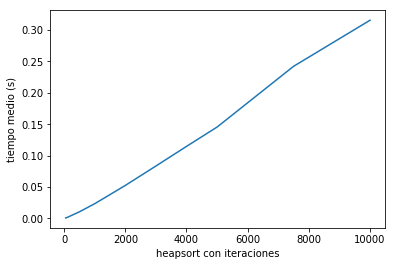

selectionsort
[50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
[0.000649439294816645, 0.0023881639257865572, 0.06070480474626727, 0.24256481313487654, 0.9860241549570112, 2.218766092625497, 3.912376175591749, 6.184833857693478, 14.18057449472251, 25.249641644298595]


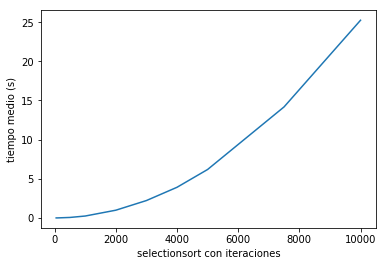

mergesort
[50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
[0.0004960892775471848, 0.0010349969318568242, 0.005908973498215175, 0.012598416603657014, 0.02630470027151155, 0.04078406589684036, 0.05557521357407147, 0.0919432271912548, 0.10880179041223847, 0.16478461275399958]


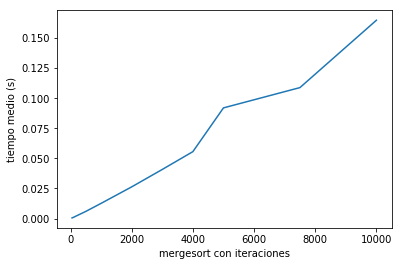

quicksort
[50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
[0.00023882135142549998, 0.0005197556304850082, 0.0033582177810291824, 0.007300835892463553, 0.015916689097439374, 0.024965803593664404, 0.03575186984357437, 0.04846819359414667, 0.07023410466392299, 0.1175151884981851]


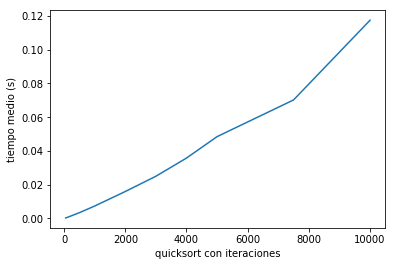

insertion
[50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
[0.00024206777375646027, 0.0008489475667037283, 0.02236404652530055, 0.09423050648646836, 0.38365575148463726, 0.8592553610645268, 1.5168933067598935, 2.3920921844177503, 5.375669704138893, 11.017548408265853]


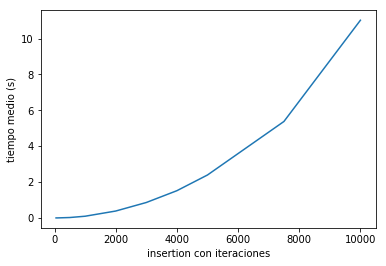

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

#grafico los tiempos medios para cada algoritmo
algoritmos_x = {}
algoritmos_y = {}
for t in tiempos_medio_algoritmo_rango.keys():
    print ('t ' + str(t))
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg] = list()    
        algoritmos_y[alg] = list()
        
for t in tiempos_medio_algoritmo_rango.keys():
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg].append(t)
        algoritmos_y[alg].append(tiempos_medio_algoritmo_rango[t][alg])
    #print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    #print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    #print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    #print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    #print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
for alg in algoritmos_x.keys():
    print(alg)
    print(algoritmos_x[alg])
    print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg])
    plt.xlabel(alg + ' con iteraciones')   
    plt.ylabel('tiempo medio (s)')
    plt.show()
        
        
    #algoritmo1_y.append(tiempos_medio_algoritmo_rango[t]['heapsort'])
    #print ([t,tiempos_medio_algoritmo_rango[t]['heapsort']])
# tendria que agarrar un algoritmo y graficar todos sus tiempos

#plt.plot(algoritmo1_x, algoritmo1_y)
#plt.xlabel('iteraciones')
#plt.ylabel('tiempo medio')
#plt.show()